In [32]:
#Importing dependencies

import pandas as pd
import fbprophet
import matplotlib.pyplot as plt
from fbprophet import Prophet
%matplotlib inline

In [33]:
df = pd.read_csv("/content/airline_passengers.csv")

In [34]:
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [35]:
df.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


Got to remove this 144th row. As it has no significance

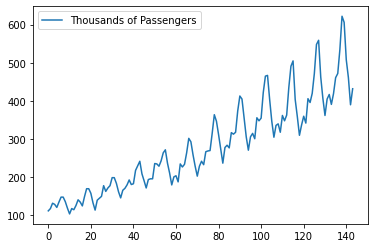

In [36]:
df.plot()

When using Prophet, the dataset should have two columns with specific names:

"ds": This column should contain the timestamps or dates of the time series, and it should be of the format "YYYY-MM-DD" for daily data or "YYYY-MM-DD HH:MM:SS" for hourly or sub-daily data.

"y": This column should contain the numeric values of the time series that we want to forecast.

It's important to use these specific names for the columns, as Prophet expects them to be in this format when making predictions. If your dataset has different column names, you can rename them

In [37]:
df.columns = ['ds','y']
df.head()

,ds,y
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [38]:
df.drop(144, axis=0, inplace=True)

In [39]:
df.tail()

,ds,y
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      144 non-null    object 
 1   y       144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


Date is not in the correct dtype. Lets change it to date time data type.

In [41]:
df['ds'] = pd.to_datetime(df['ds'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      144 non-null    datetime64[ns]
 1   y       144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [42]:
df.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [43]:
#model initialization

model = Prophet()

In [44]:
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [46]:
#forcasting 

fcast = model.make_future_dataframe(periods=365)

In [47]:
pred = model.predict(fcast)

In [48]:
pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.763021,56.972616,113.839188,106.763021,106.763021,-21.935881,-21.935881,-21.935881,-21.935881,-21.935881,-21.935881,0.0,0.0,0.0,84.827140
1,1949-02-01,108.935527,50.777572,105.138425,108.935527,108.935527,-30.689957,-30.689957,-30.689957,-30.689957,-30.689957,-30.689957,0.0,0.0,0.0,78.245570
2,1949-03-01,110.897791,80.668145,137.285043,110.897791,110.897791,-0.502721,-0.502721,-0.502721,-0.502721,-0.502721,-0.502721,0.0,0.0,0.0,110.395070
3,1949-04-01,113.070297,76.651913,137.563440,113.070297,113.070297,-5.177145,-5.177145,-5.177145,-5.177145,-5.177145,-5.177145,0.0,0.0,0.0,107.893153
4,1949-05-01,115.172723,81.816204,140.316818,115.172723,115.172723,-3.771357,-3.771357,-3.771357,-3.771357,-3.771357,-3.771357,0.0,0.0,0.0,111.401366


In [49]:
df.tail()

,ds,y
139,1960-08-01,606.0
140,1960-09-01,508.0
141,1960-10-01,461.0
142,1960-11-01,390.0
143,1960-12-01,432.0


In [50]:
fcast.tail()

,ds
504,1961-11-27
505,1961-11-28
506,1961-11-29
507,1961-11-30
508,1961-12-01


Dataframe values added by 365 days

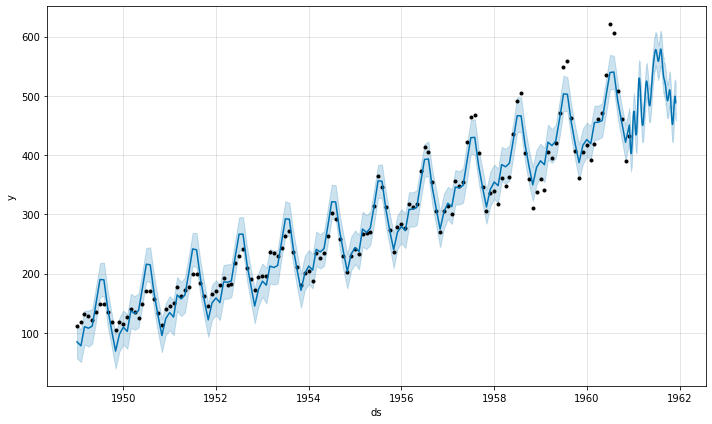

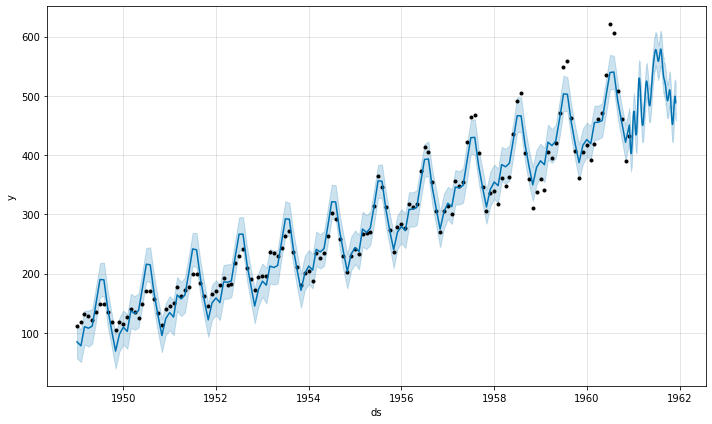

In [51]:
model.plot(pred)

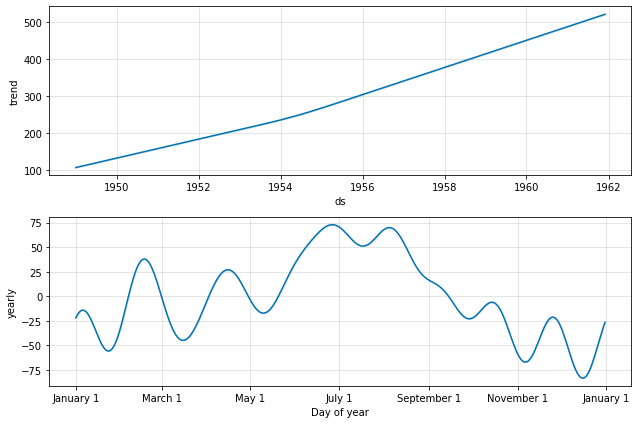

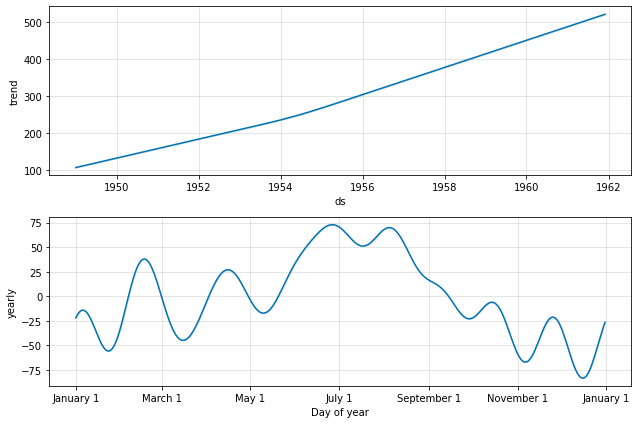

In [52]:
model.plot_components(pred)

In [54]:
#Cross validation

from fbprophet.diagnostics import cross_validation

df_cv = cross_validation(model, initial='730 days', period = '180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 19 forecasts with cutoffs between 1951-01-18 00:00:00 and 1959-12-02 00:00:00


  0%|          | 0/19 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1951-02-01,159.442916,159.079000,159.846388,150.0,1951-01-18
1,1951-03-01,172.072908,170.832773,173.284347,178.0,1951-01-18
2,1951-04-01,158.439108,156.053377,160.878036,163.0,1951-01-18
3,1951-05-01,142.884028,138.974190,146.846895,172.0,1951-01-18
4,1951-06-01,175.806867,170.193321,181.524494,178.0,1951-01-18


In [55]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,40 days,1092.994523,33.060468,26.040774,0.079380,0.074178,0.227273
1,42 days,1018.230083,31.909718,25.353268,0.077486,0.074178,0.181818
2,46 days,915.539058,30.257876,24.856413,0.079819,0.084510,0.136364
3,47 days,1053.224624,32.453422,26.965431,0.082392,0.085710,0.136364
4,48 days,1041.995411,32.279954,26.376037,0.080289,0.085710,0.181818


/usr/local/lib/python3.8/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.8/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


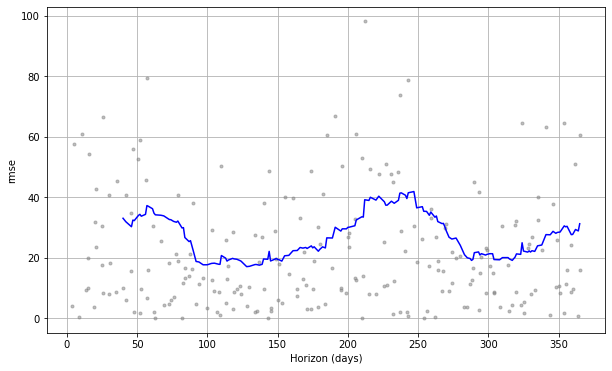

In [56]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

/usr/local/lib/python3.8/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.8/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


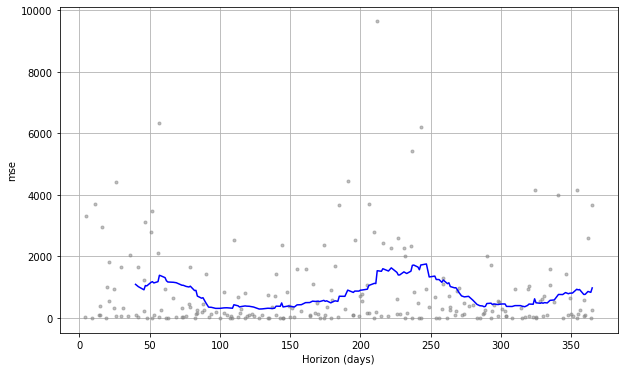

In [57]:
fig = plot_cross_validation_metric(df_cv, metric='mse')